<a href="https://colab.research.google.com/github/Tanya7777/Taxi-service-Data-Analysis-Prediction/blob/main/Taxi_DataAnalysis_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Data Preprocessing

In [ ]:
# Data Preparation:
#   Data cleaning
#   Feature engineering
#   Splitting the data into training and test sets
#Exploratory Data Analysis (EDA):
#   Demand, fare, and congestion patterns
#Modeling:
#   Time Series Forecasting (SARIMA, LSTM)
#   Regression Models (Linear Regression, Gradient Boosting)
#   Clustering (K-Means, DBSCAN)
#   Classification (Random Forest, Decision Trees)
#Evaluation and Prediction.
#   Mean Squared Error (MSE) for regression models
#   F1-score for classification tasks.

In [ ]:
import pandas as pd
import numpy as np
import joblib
import os
import csv
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


# file paths for 8 months
import pandas as pd

file_paths = [
    '/content/drive/My Drive/Minor_AK8/yellow_tripdata_2021-01.csv',
    '/content/drive/My Drive/Minor_AK8/yellow_tripdata_2021-02.csv',
    '/content/drive/My Drive/Minor_AK8/yellow_tripdata_2021-03.csv',
    '/content/drive/My Drive/Minor_AK8/yellow_tripdata_2021-04.csv',
    '/content/drive/My Drive/Minor_AK8/yellow_tripdata_2021-05.csv',
    '/content/drive/My Drive/Minor_AK8/yellow_tripdata_2021-06.csv',
    '/content/drive/My Drive/Minor_AK8/yellow_tripdata_2021-07.csv',
    '/content/drive/My Drive/Minor_AK8/yellow_tripdata_2021-08.csv',

]

# Columns you want to drop
columns_to_drop = ['VendorID', 'store_and_fwd_flag', 'payment_type', 'RatecodeID',
                   'extra', 'mta_tax', 'improvement_surcharge', 'tolls_amount', 'congestion_surcharge']

# Loop through each file, load it, drop columns, and save it back
dataframes = []  # To store each dataframe
for file_path in file_paths:
    # Loading the CSV into a dataframe
    df = pd.read_csv(file_path)

    # Dropping the specified columns
    #df = df.drop(columns=columns_to_drop)

    # Save the modified dataframe back to the same file
    df.to_csv(file_path, index=False)

    # Appending the dataframe to the list
    dataframes.append(df)

# concatenate all the dataframes into one
all_data = pd.concat(dataframes)






<ipython-input-38-bfe38c4a91ec>:24: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-38-bfe38c4a91ec>:24: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-38-bfe38c4a91ec>:24: DtypeWarning: Columns (2,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-38-bfe38c4a91ec>:24: DtypeWarning: Columns (2,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-38-bfe38c4a91ec>:24: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-38-bfe38c4a91ec>:24: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
all_data.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,airport_fee
0,2021-01-01 00:30:10.000000,2021-01-01 00:36:12.000000,1,2.10,142.0,43.0,8.0,0.00,11.80,\N
1,2021-01-01 00:51:20.000000,2021-01-01 00:52:19.000000,1,0.20,238.0,151.0,3.0,0.00,4.30,\N
2,2021-01-01 00:43:30.000000,2021-01-01 01:11:06.000000,1,14.70,132.0,165.0,42.0,8.65,51.95,\N
3,2021-01-01 00:15:48.000000,2021-01-01 00:31:01.000000,0,10.60,138.0,132.0,29.0,6.05,36.35,\N
4,2021-01-01 00:31:49.000000,2021-01-01 00:48:21.000000,1,4.94,68.0,33.0,16.5,4.06,24.36,\N
5,2021-01-01 00:16:29.000000,2021-01-01 00:24:30.000000,1,1.60,224.0,68.0,8.0,2.35,14.15,\N
6,2021-01-01 00:00:28.000000,2021-01-01 00:17:28.000000,1,4.10,95.0,157.0,16.0,0.00,17.30,\N
7,2021-01-01 00:12:29.000000,2021-01-01 00:30:34.000000,1,5.70,90.0,40.0,18.0,0.00,21.80,\N
8,2021-01-01 00:39:16.000000,2021-01-01 01:00:13.000000,1,9.10,97.0,129.0,27.5,0.00,28.80,\N
9,2021-01-01 00:26:12.000000,2021-01-01 00:39:46.000000,2,2.70,263.0,142.0,12.0,3.15,18.95,\N


In [ ]:
# converting pickup and dropoff times to datetime

In [ ]:
all_data['tpep_pickup_datetime'] = pd.to_datetime(all_data['tpep_pickup_datetime'])
all_data['tpep_dropoff_datetime'] = pd.to_datetime(all_data['tpep_dropoff_datetime'])

In [ ]:
# Feature extraction: Trip duration (in minutes)

In [ ]:
from re import A
all_data['tpep_trip_duration'] = (all_data['tpep_dropoff_datetime'] - all_data['tpep_pickup_datetime']).dt.total_seconds() / 60

In [ ]:
# Feature extraction: Hour, day, and month

In [ ]:
all_data['hour'] = all_data['tpep_pickup_datetime'].dt.hour
all_data['day_of_week'] = all_data['tpep_pickup_datetime'].dt.dayofweek
all_data['month'] = all_data['tpep_pickup_datetime'].dt.month

In [ ]:
all_data.tail(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,airport_fee,tpep_trip_duration,hour,day_of_week,month
2270672,2021-08-27 13:45:41,2021-08-27 13:53:35,2,0.90,161.0,186.0,6.5,0.00,9.80,0.0,7.900000,13,4,8
2270673,2021-08-27 13:19:02,2021-08-27 13:30:29,1,1.60,113.0,68.0,8.5,0.00,11.80,0.0,11.450000,13,4,8
2270674,2021-08-27 13:40:22,2021-08-27 13:53:25,1,1.80,68.0,163.0,10.0,2.65,15.95,0.0,13.050000,13,4,8
2270675,2021-08-27 13:54:46,2021-08-27 14:08:03,1,1.90,163.0,236.0,10.0,2.65,15.95,0.0,13.283333,13,4,8
2270676,2021-08-27 13:04:15,2021-08-27 13:30:20,1,3.71,163.0,144.0,17.5,25.00,45.80,0.0,26.083333,13,4,8
2270677,2021-08-27 13:54:28,2021-08-27 15:01:18,2,16.58,79.0,132.0,52.0,15.46,77.31,0.0,66.833333,13,4,8
2270678,2021-08-27 13:16:00,2021-08-27 13:33:54,1,2.26,230.0,107.0,12.5,3.16,18.96,0.0,17.900000,13,4,8
2270679,2021-08-27 13:53:20,2021-08-27 13:59:25,1,0.97,137.0,164.0,6.0,0.00,9.30,0.0,6.083333,13,4,8
2270680,2021-08-27 13:07:08,2021-08-27 13:24:36,2,1.80,90.0,79.0,12.0,0.00,15.30,0.0,17.466667,13,4,8
2270681,2021-08-27 13:29:47,2021-08-27 13:47:16,1,1.90,NaN,NaN,NaN,NaN,NaN,NaN,17.483333,13,4,8


# 2. Exploratory Data Analysis (EDA)
#    Plot demand, fare, and congestion patterns based on time features.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Demand pattern by hour

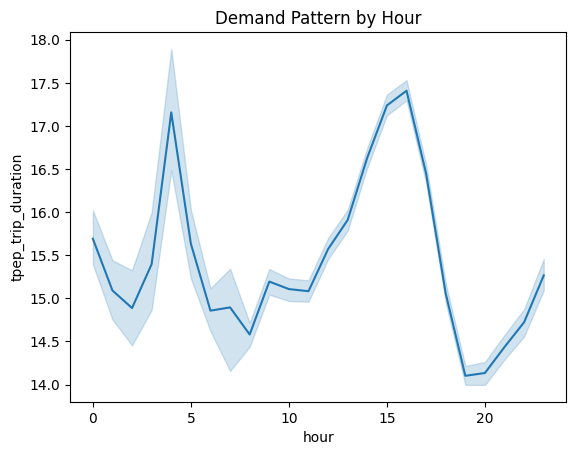

In [ ]:
sns.lineplot(x='hour', y='tpep_trip_duration', data=all_data)
plt.title('Demand Pattern by Hour')
plt.show()

In [ ]:
# Fare pattern by day of the week

In [ ]:
# Calculate the average fare amount for each day of the week
# This will group the data by 'day_of_week' and calculate the mean of 'fare_amount' for each group.
# The reset_index() is used to convert the grouped result back into a DataFrame.

In [ ]:
daily_avg_fare = all_data.groupby('day_of_week')['fare_amount'].mean().reset_index()

In [ ]:
# Now plot the average fare by day of the week using the aggregated data


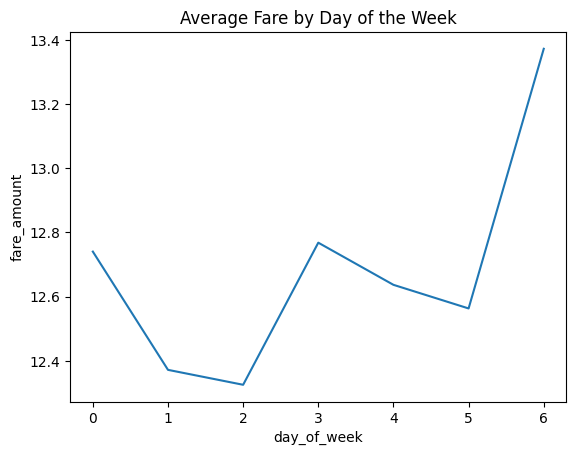

In [ ]:
sns.lineplot(x='day_of_week', y='fare_amount', data=daily_avg_fare)
plt.title('Average Fare by Day of the Week')
plt.show()

In [ ]:
# Check correlation between features

<ipython-input-56-501d4701bdbe>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[column] = pd.to_numeric(chunk[column].astype(str).str.replace(r'\\N', 'NaN'), errors='coerce')
<ipython-input-56-501d4701bdbe>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk[column] = pd.to_numeric(chunk[column].astype(str).str.replace(r'\\N', 'NaN'), errors='coerce')
<ipython-input-56-501d4701bdbe>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

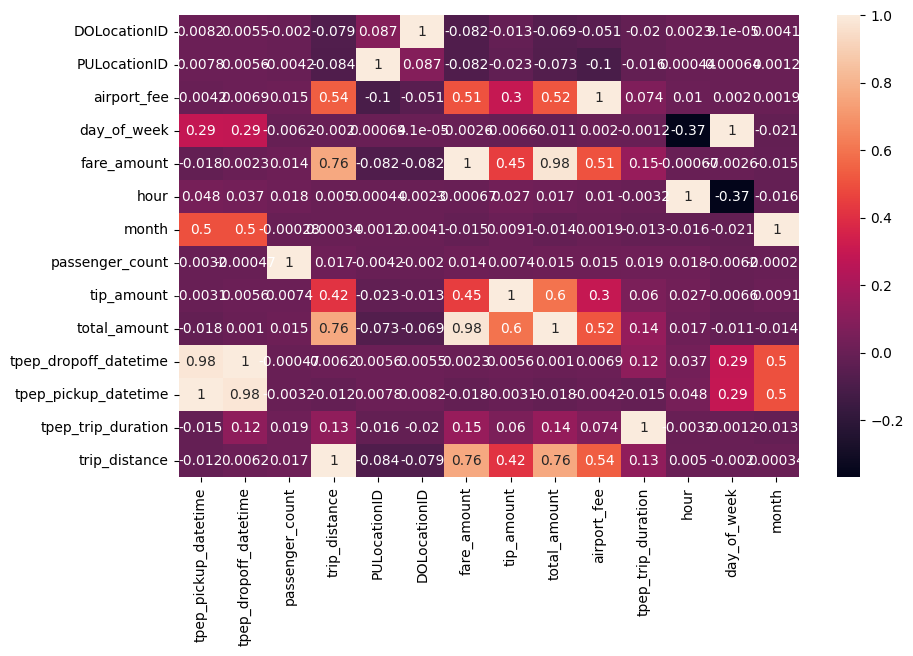

In [ ]:
chunk_size = 50000

chunk_correlations = []
total_rows = len(all_data)

# Process data in chunks
for i in range(0, total_rows, chunk_size):
    chunk = all_data[i:i + chunk_size]  # Extract a chunk of data
    # Replace '\\N' with NaN and convert to numeric within the chunk
    for column in chunk.columns:
        if chunk[column].astype(str).str.contains(r'\\N').any():
            chunk[column] = pd.to_numeric(chunk[column].astype(str).str.replace(r'\\N', 'NaN'), errors='coerce')

    # Calculate correlation for the current chunk and append to the list
    chunk_correlations.append(chunk.corr())

# Concatenate the correlations from all chunks
all_correlations = pd.concat(chunk_correlations)

# Calculate the average correlation across all chunks
average_correlation = all_correlations.groupby(all_correlations.index).mean()
plt.figure(figsize=(10,6))
sns.heatmap(average_correlation, annot=True)
plt.show()



#  3. Time Series Forecasting (SARIMA): forecasting trip demand


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from joblib import dump

In [ ]:
# Forecasting using the `predict()` method
forecast_steps = 1  # Number of steps to forecast
forecast_start = len(df)  # Start the forecast at the end of the dataset
forecast_end = forecast_start + forecast_steps - 1

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [ ]:
df_filtered = df[(df['tpep_pickup_datetime'] >= '2021-01-01') & (df['tpep_pickup_datetime'] <= '2021-08-30')]


In [ ]:
# Convert 'tpep_dropoff_datetime' to datetime objects before subtraction
df_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df_filtered['tpep_dropoff_datetime'])

# Calculate trip duration
df_filtered['tpep_trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds()

<ipython-input-61-f5545bd37490>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df_filtered['tpep_dropoff_datetime'])
<ipython-input-61-f5545bd37490>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tpep_trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds()


In [ ]:
df_filtered.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,airport_fee,tpep_trip_duration
0,2021-08-01 00:04:06,2021-08-01 00:26:07,2,3.52,43.0,42.0,16.5,5.08,25.38,0.0,1321.0
1,2021-08-01 00:34:14,2021-08-01 00:43:02,0,2.10,79.0,233.0,9.0,0.00,12.80,0.0,528.0
2,2021-08-01 00:43:53,2021-08-01 00:55:04,0,1.40,170.0,90.0,8.5,3.05,15.35,0.0,671.0
3,2021-08-01 00:53:19,2021-08-01 00:55:34,1,0.40,229.0,229.0,4.0,1.17,8.97,0.0,135.0
4,2021-08-01 00:58:54,2021-08-01 01:11:23,1,2.90,233.0,249.0,12.0,2.00,17.80,0.0,749.0
5,2021-08-01 00:11:59,2021-08-01 00:17:15,1,0.55,263.0,140.0,5.0,1.76,10.56,0.0,316.0
6,2021-08-01 00:28:29,2021-08-01 00:48:37,1,8.22,138.0,41.0,25.0,7.89,35.44,1.25,1208.0
7,2021-08-01 00:21:11,2021-08-01 00:32:59,1,3.90,236.0,4.0,13.5,3.45,20.75,0.0,708.0
8,2021-08-01 00:37:38,2021-08-01 00:58:26,4,3.50,4.0,80.0,15.5,0.00,19.30,0.0,1248.0
9,2021-08-01 00:08:46,2021-08-01 00:30:40,1,5.63,234.0,238.0,20.5,4.86,29.16,0.0,1314.0


In [ ]:
daily_demand = df_filtered.resample('D', on='tpep_pickup_datetime')['tpep_trip_duration'].count()


In [ ]:
# Split the data (80% for training, 20% for testing)
train_size = int(0.8 * len(daily_demand))
train, test = daily_demand[:train_size], daily_demand[train_size:]


In [ ]:
# Install the pmdarima package for auto_arima
!pip install pmdarima

from pmdarima import auto_arima

# Auto ARIMA to determine the best parameters for the model
auto_model = auto_arima(train, seasonal=True, m=7, trace=True, suppress_warnings=True)

# Print the best model summary
print(auto_model.summary())


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the best SARIMA model
sarima_model = SARIMAX(train,
                       order=(3,2,1),              # (p, d, q)
                       seasonal_order=(1,1,1,7))  # (P, D, Q, m)

sarima_results = sarima_model.fit()

# Print the summary of the model
print(sarima_results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                tpep_trip_duration   No. Observations:                   36
Model:             SARIMAX(3, 2, 1)x(1, 1, 1, 7)   Log Likelihood                -305.323
Date:                           Fri, 11 Apr 2025   AIC                            624.647
Time:                                   14:43:17   BIC                            633.718
Sample:                               07-14-2021   HQIC                           627.344
                                    - 08-18-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1007      1.347      0.075      0.940      -2.539       2.740
ar.L2         -0.0148      1.845     -0.008

In [ ]:
import joblib
import os
# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')
dump(sarima_results, 'models/sarima_model.joblib')


['models/sarima_model.joblib']

In [ ]:
# Make predictions for the test set
predictions = sarima_results.get_forecast(steps=len(test))
forecast = predictions.predicted_mean
conf_int = predictions.conf_int()  # Confidence intervals for predictions


In [ ]:
import pandas as pd
#daily_demand = pd.Series(daily_demand.values,  # Use .values to get the underlying array
#                         index=pd.date_range(start='2021-01-01',
#                                             periods=len(daily_demand),
#                                             freq='D'))

forecast_start = daily_demand.index[-1]  # Use the last date in the training data

# Or, if you specifically want the next day, use this line instead:
# forecast_start = daily_demand.index[-1] + pd.DateOffset(days=1)

forecast_end = forecast_start + pd.DateOffset(days=30)  # Forecast for the next 30 days (adjust as needed)

# For dynamic forecasting (out-of-sample), you can set dynamic to True or a specific point:
demand_prediction = sarima_results.get_prediction(start=forecast_start, end=forecast_end, dynamic=True).predicted_mean
# If you want a one-step-ahead forecast use:
# demand_prediction = sarima_results.get_forecast(steps=1).predicted_mean

print(f"Forecasted demand for the next period: {demand_prediction}")

Forecasted demand for the next period: 2021-08-27    90006.516153
2021-08-28    83277.589749
2021-08-29    83232.371463
2021-08-30    86800.562067
2021-08-31    92393.226687
2021-09-01    93123.209699
2021-09-02    90106.771931
2021-09-03    86455.201947
2021-09-04    79181.831937
2021-09-05    79077.931750
2021-09-06    82027.997741
2021-09-07    86945.314442
2021-09-08    87018.854430
2021-09-09    83412.640089
2021-09-10    79191.471261
2021-09-11    71328.458899
2021-09-12    70552.753693
2021-09-13    72925.639865
2021-09-14    77275.455608
2021-09-15    76778.297031
2021-09-16    72590.108035
2021-09-17    67783.551653
2021-09-18    59338.541934
2021-09-19    57994.736518
2021-09-20    59783.517396
2021-09-21    63547.590746
2021-09-22    62465.230623
2021-09-23    57693.747341
2021-09-24    52304.473937
2021-09-25    43276.173771
2021-09-26    41346.727320
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [ ]:
from joblib import dump

# After training
dump(model, 'sarima.joblib')


['sarima.joblib']

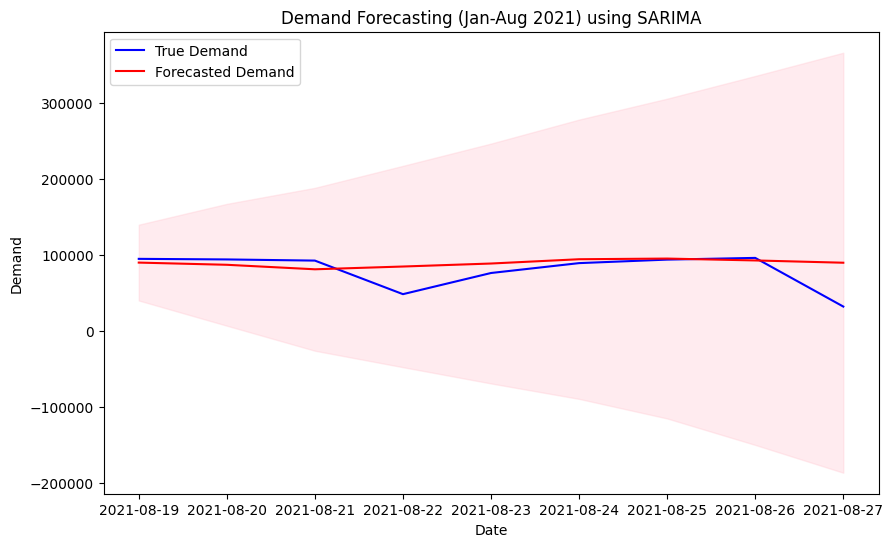

In [ ]:
import matplotlib.pyplot as plt

# Plot true demand vs forecasted demand
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='True Demand', color='blue')
plt.plot(test.index, forecast, label='Forecasted Demand', color='red')

# Optionally plot the confidence intervals
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

plt.title('Demand Forecasting (Jan-Aug 2021) using SARIMA')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()


In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 559854455.115988
Mean Absolute Error: 15512.418393149257


#4. LSTM Model for Time Series Forecasting

In [ ]:
# Resample the data to daily frequency, counting the number of trips per day
daily_demand = df_filtered.resample('D', on='tpep_pickup_datetime')['tpep_trip_duration'].count()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Reshape the data for scaling
daily_demand = daily_demand.values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_demand)


In [ ]:
# Create sequences for LSTM
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Define the number of time steps (e.g., using the past 30 days to predict the next day)
time_steps = 30

# Create sequences
X, y = create_sequences(scaled_data, time_steps)

# Reshape X to [samples, time steps, features] for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
# Define training size (80% of the data)
train_size = int(0.8 * len(X))

# Create train and test sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# First LSTM layer
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.8495 - val_loss: 0.4867
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 0.5468 - val_loss: 0.2638
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.3203 - val_loss: 0.1213
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.1466 - val_loss: 0.1228
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0335 - val_loss: 0.3603
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 0.1202 - val_loss: 0.4625
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.1437 - val_loss: 0.3742
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.1174 - val_loss: 0.2401
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0506 - val_loss: 0.1509
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0437 - val_loss: 0.1085
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0256 - val_loss: 0.0961
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0418 - val_loss: 0.

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse the scaling to get actual demand values
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


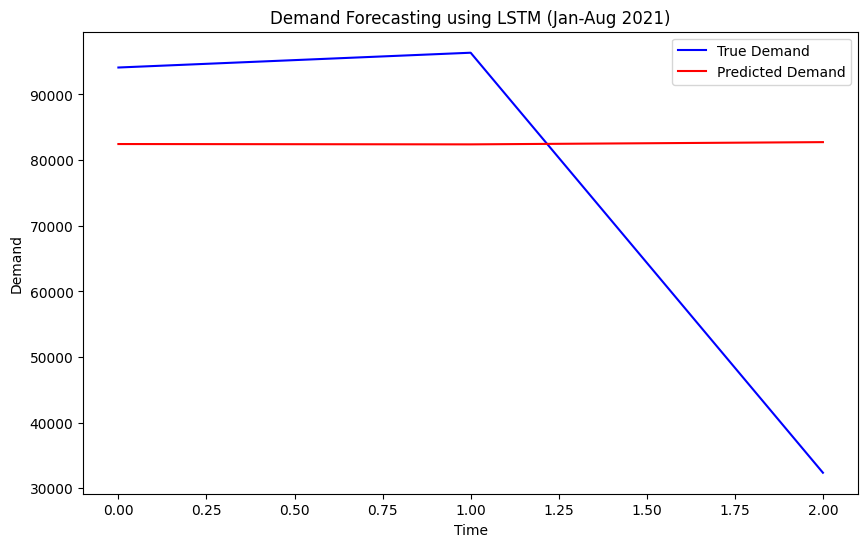

In [ ]:

# Plot actual vs predicted demand
plt.figure(figsize=(10,6))
plt.plot(y_test_scaled, label='True Demand', color='blue')
plt.plot(predictions, label='Predicted Demand', color='red')

plt.title('Demand Forecasting using LSTM (Jan-Aug 2021)')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE
mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 955138813.3739014
Mean Absolute Error: 25319.453125


# 5. Linear Regression for Fare Prediction

In [ ]:
import pandas as pd



# Convert 'pickup_datetime' to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Filter data for the period Jan 2021 to Aug 2021
df_filtered = df[(df['tpep_pickup_datetime'] >= '2021-01-01') & (df['tpep_pickup_datetime'] <= '2021-08-31')]


In [ ]:
# Convert 'tpep_dropoff_datetime' to datetime objects before subtraction
df_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df_filtered['tpep_dropoff_datetime'])

# Calculate trip duration
df_filtered['tpep_trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds()

<ipython-input-81-f5545bd37490>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df_filtered['tpep_dropoff_datetime'])
<ipython-input-81-f5545bd37490>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tpep_trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds()


In [ ]:
# Extract hour, day, and weekday information from pickup time
df_filtered['hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
df_filtered['day'] = df_filtered['tpep_pickup_datetime'].dt.day
df_filtered['weekday'] = df_filtered['tpep_pickup_datetime'].dt.weekday

# Select the relevant features
features = df_filtered[['tpep_trip_duration', 'hour', 'weekday', 'passenger_count']]
target = df_filtered['fare_amount']  # Assuming 'fare_amount' is the column name for fare


<ipython-input-82-c5f9fcb15456>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
<ipython-input-82-c5f9fcb15456>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day'] = df_filtered['tpep_pickup_datetime'].dt.day
<ipython-input-82-c5f9fcb15456>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
# Check for missing values
print(features.isnull().sum())
df_filtered = df_filtered.dropna(subset=['fare_amount'])

# Recalculate features and target after dropping missing values
features = df_filtered[['tpep_trip_duration', 'hour', 'weekday', 'passenger_count']]
target = df_filtered['fare_amount']

# Drop any rows with invalid values (e.g., negative fare or duration)
#features = features[features['tpep_trip_duration'] > 0]
#target = target[features.index]


tpep_trip_duration    0
hour                  0
weekday               0
passenger_count       0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


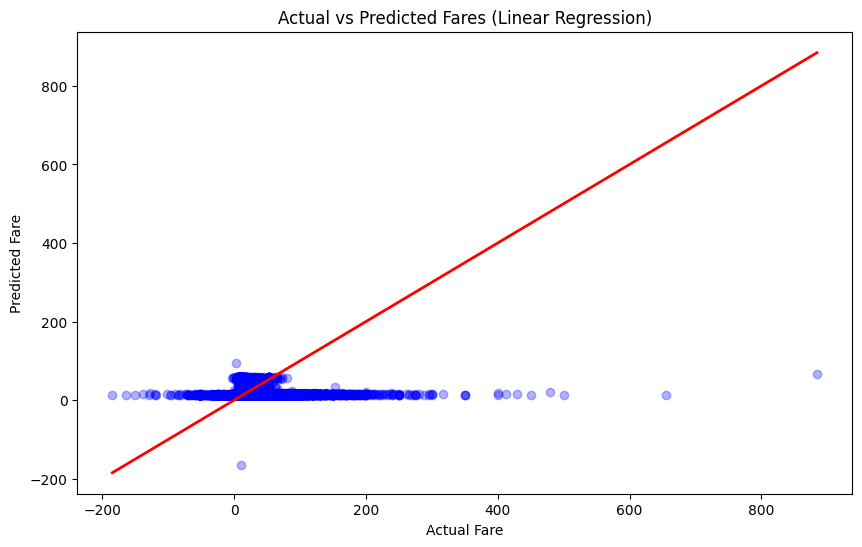

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted fares
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.title('Actual vs Predicted Fares (Linear Regression)')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 159.86160463182676
Mean Absolute Error: 7.573908887034776


# 6. gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Convert 'pickup_datetime' to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Filter data for the period Jan 2021 to Aug 2021
df_filtered = df[(df['tpep_pickup_datetime'] >= '2021-01-01') & (df['tpep_pickup_datetime'] <= '2021-08-31')]

In [ ]:
# Convert 'tpep_dropoff_datetime' to datetime objects before subtraction
df_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df_filtered['tpep_dropoff_datetime'])

# Calculate trip duration
df_filtered['tpep_trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds()

<ipython-input-91-f5545bd37490>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df_filtered['tpep_dropoff_datetime'])
<ipython-input-91-f5545bd37490>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tpep_trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds()


In [ ]:
# Extract hour, day, and weekday information from pickup time
df_filtered['hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
df_filtered['day'] = df_filtered['tpep_pickup_datetime'].dt.day
df_filtered['weekday'] = df_filtered['tpep_pickup_datetime'].dt.weekday

# Select the relevant features
features = df_filtered[['tpep_trip_duration', 'hour', 'weekday', 'passenger_count']]
target = df_filtered['fare_amount']  # Assuming 'fare_amount' is the column name for fare





<ipython-input-92-ce552192e686>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
<ipython-input-92-ce552192e686>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day'] = df_filtered['tpep_pickup_datetime'].dt.day
<ipython-input-92-ce552192e686>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
print(target.isnull().sum())

# Drop rows with missing values in the target variable before splitting
df_filtered = df_filtered.dropna(subset=['fare_amount'])

# Recalculate features and target after dropping missing values
features = df_filtered[['tpep_trip_duration', 'hour', 'weekday', 'passenger_count']]
target = df_filtered['fare_amount']


1


In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of individual estimators
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required in a leaf node
    'subsample': [0.8, 1.0],  # Fraction of samples used for each tree
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when splitting
}


In [ ]:
# Initialize the model
#gb_model = GradientBoostingRegressor(random_state=42)


In [ ]:
# Perform grid search with 3-fold cross-validation
#grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the training data
#grid_search.fit(X_train, y_train)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
model2 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gradient_results=model2.fit(X_train, y_train)


In [ ]:
# Make predictions on the test set
y_pred = model2.predict(X_test)


In [ ]:
import joblib
import os
# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')
dump(gradient_results, 'models/gradient_model.joblib')

['models/gradient_model.joblib']

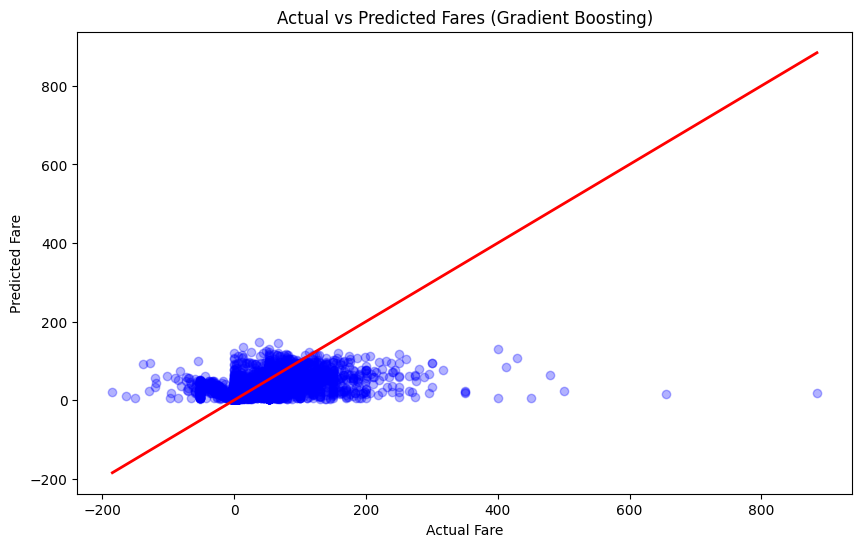

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted fares
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.title('Actual vs Predicted Fares (Gradient Boosting)')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 48.89462325907496
Mean Absolute Error: 2.422787884236881


# 7.K-Means Clustering for Demand Zones

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Convert 'pickup_datetime' to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Filter data for the period Jan 2021 to Aug 2021
df_filtered = df[(df['tpep_pickup_datetime'] >= '2021-01-01') & (df['tpep_pickup_datetime'] <= '2021-08-31')]

In [ ]:
df_filtered = df[['PULocationID']].dropna()

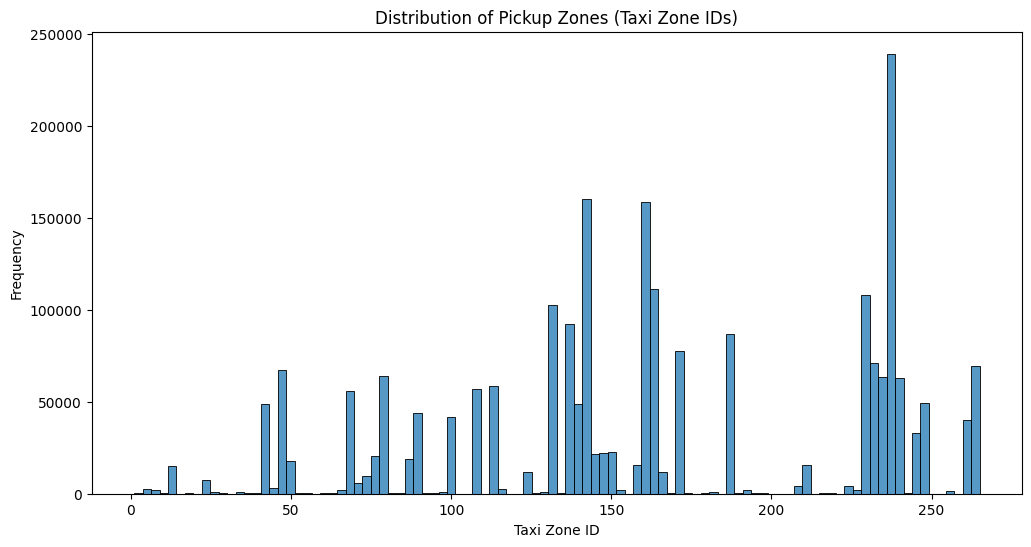

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of pickup locations (taxi zones)
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['PULocationID'], bins=100)
plt.title('Distribution of Pickup Zones (Taxi Zone IDs)')
plt.xlabel('Taxi Zone ID')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Convert PULocationID to integer (if not already)
df_filtered['PULocationID'] = df_filtered['PULocationID'].astype(int)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Count pickups per zone (demand)
zone_demand = df_filtered['PULocationID'].value_counts().reset_index()
zone_demand.columns = ['PULocationID', 'demand']


# Define the number of clusters (demand zones)
num_clusters = 20 # You can change this to experiment with different numbers of zones

# Initialize K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the pickup location IDs (reshaped for clustering)
kmeans_results=kmeans.fit(df_filtered[['PULocationID']])

# Get cluster labels for each taxi zone (pickup zone)
df_filtered['demand_zone'] = kmeans.labels_

# Get the centers of the clusters (centroids of demand zones)
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers (Taxi Zone IDs):\n", cluster_centers)


Cluster Centers (Taxi Zone IDs):
 [[186.15521042]
 [ 89.21268657]
 [233.5057731 ]
 [140.45605746]
 [ 14.98787549]
 [162.21333594]
 [ 46.11933121]
 [262.65226864]
 [113.58009835]
 [ 68.05052308]
 [247.76489456]
 [131.25648216]
 [210.67949139]
 [ 77.64166914]
 [237.28880555]
 [106.99894594]
 [149.54540185]
 [169.9995662 ]
 [229.60355257]
 [ 99.91528688]]


In [ ]:
from joblib import dump
import joblib
import os
# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')
dump(kmeans_results, 'models/kmeans_model.joblib')


['models/kmeans_model.joblib']

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


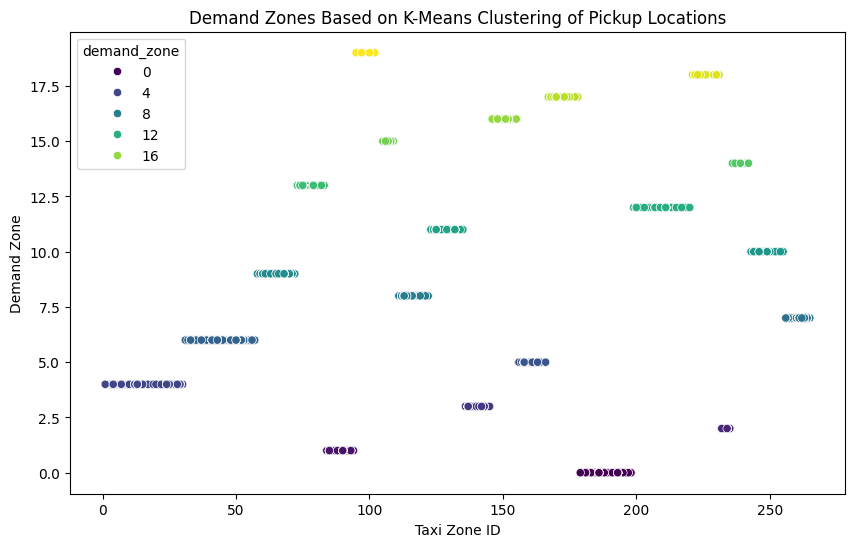

In [ ]:
# Plot the demand zones (clusters)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['PULocationID'], y=df_filtered['demand_zone'], hue=df_filtered['demand_zone'], palette='viridis')
plt.title('Demand Zones Based on K-Means Clustering of Pickup Locations')
plt.xlabel('Taxi Zone ID')
plt.ylabel('Demand Zone')
plt.show()


In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
zone_demand['demand_zone'] = kmeans.fit_predict(zone_demand[['demand']])
# Print cluster centers (demand levels in each zone)
print("Cluster Centers (Demand Levels):\n", kmeans.cluster_centers_)

Cluster Centers (Demand Levels):
 [[6.97809524e+02]
 [5.69047500e+04]
 [1.73850000e+04]
 [1.03430000e+05]
 [8.37690000e+04]
 [3.36100000e+04]
 [6.26380000e+04]
 [9.65225000e+03]
 [4.25080000e+04]
 [4.98050000e+04]
 [2.83772000e+04]
 [7.61565000e+04]
 [1.49786667e+04]
 [2.61884615e+03]
 [2.16916667e+04]
 [6.66670000e+04]
 [6.44766667e+03]
 [8.70135000e+04]
 [6.13727811e+01]
 [1.20596667e+04]]


In [ ]:
# Count the number of pickups in each demand zone
zone_counts = df_filtered['demand_zone'].value_counts().sort_index()

# Display demand per zone
for zone, count in zone_counts.items():
    print(f"Demand Zone {zone}: {count} pickups")


Demand Zone 0: 91173 pickups
Demand Zone 1: 62980 pickups
Demand Zone 2: 105749 pickups
Demand Zone 3: 321488 pickups
Demand Zone 4: 29362 pickups
Demand Zone 5: 297062 pickups
Demand Zone 6: 139536 pickups
Demand Zone 7: 110617 pickups
Demand Zone 8: 61412 pickups
Demand Zone 9: 64426 pickups
Demand Zone 10: 83554 pickups
Demand Zone 11: 115895 pickups
Demand Zone 12: 21313 pickups
Demand Zone 13: 94396 pickups
Demand Zone 14: 302373 pickups
Demand Zone 15: 56923 pickups
Demand Zone 16: 48302 pickups
Demand Zone 17: 78377 pickups
Demand Zone 18: 143164 pickups
Demand Zone 19: 42579 pickups


In [ ]:
# Add additional features for clustering
df['hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
df_filtered = df[['PULocationID', 'trip_distance', 'fare_amount', 'hour']].dropna()

# Apply clustering on multiple features
kmeans2_results = kmeans.fit(df_filtered)


In [ ]:
!pip install pyogrio

In [ ]:
import geopandas as gpd
import os

shapefile_path = '/content/drive/My Drive/Minor_AK8/geo_export_4d59f0fc-9556-415c-afe2-01d647788b58.shp'
#gpd.io.file.fiona_env.set_config_option("SHAPE_RESTORE_SHX", "YES")
# Check if the .shx file exists
shx_path = shapefile_path.replace('.shp', '.shx')
if not os.path.exists(shx_path):
    print(f"Warning: .shx file not found at {shx_path}. Attempting to restore...")
    # For older geopandas versions, try creating a .shx file
    # using a geospatial library like Fiona or pyshp if available
    # or consider updating your geopandas library.
    # Example using Fiona:
    # import fiona
    # with fiona.open(shapefile_path) as src:
    #     # This might trigger creation of .shx if missing
    #     pass

# Read the shapefile
taxi_zones = gpd.read_file(shapefile_path, engine='pyogrio')

In [ ]:
print(taxi_zones.columns)


Index(['borough', 'location_i', 'objectid', 'shape_area', 'shape_leng', 'zone',
       'geometry'],
      dtype='object')


In [ ]:
import geopandas as gpd

# Load the NYC Taxi Zones shapefile (adjust the path to your shapefile location)
shapefile_path = '/content/drive/My Drive/Minor_AK8/geo_export_4d59f0fc-9556-415c-afe2-01d647788b58.shp'
taxi_zones = gpd.read_file(shapefile_path)

# Ensure the column name is correct (replace 'location_i' with the correct one, such as 'LocationID')
taxi_zones['location_i'] = taxi_zones['location_i'].astype(int)

# Merge based on the correct column name
merged_data = taxi_zones.merge(zone_demand, left_on= 'location_i', right_on='PULocationID', how='left')
# Instead of using 'inplace=True', directly assign the result back to the column
merged_data['demand_zone'] = merged_data['demand_zone'].fillna(-1)  # -1 for zones without data


<Figure size 2000x1200 with 0 Axes>

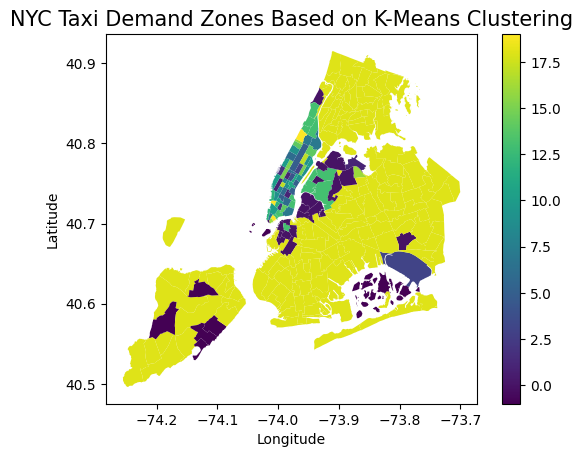

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(20, 12))

# Plot the demand zones (color-coded by cluster/demand zone)
merged_data.plot(column='demand_zone', cmap='viridis', legend=True, linewidth=0.8)

# Add a title and labels
plt.title('NYC Taxi Demand Zones Based on K-Means Clustering', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


# 8.  Classification: Random Forest for Congestion Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Convert 'pickup_datetime' to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Filter data for the period Jan 2021 to Aug 2021
df_filtered = df[(df['tpep_pickup_datetime'] >= '2021-01-01') & (df['tpep_pickup_datetime'] <= '2021-08-31')]

In [ ]:
# Select relevant columns for congestion prediction
# We'll use pickup time, location, dropoff time, etc.
df_filtered = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance', 'passenger_count']].dropna()

# Convert pickup and dropoff times to datetime format
df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])
df_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df_filtered['tpep_dropoff_datetime'])

# Extract useful time-related features (hour of day, day of week)
df_filtered['pickup_hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
df_filtered['pickup_day'] = df_filtered['tpep_pickup_datetime'].dt.dayofweek

# Calculate trip duration
df_filtered['tpep_trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60.0

In [ ]:
# Define congestion label based on trip duration per mile
df_filtered['congestion'] = (df_filtered['tpep_trip_duration'] / df_filtered['trip_distance']) > df_filtered['tpep_trip_duration'].mean()

# Convert to binary labels: 1 for high congestion, 0 for low congestion
df_filtered['congestion'] = df_filtered['congestion'].astype(int)


In [ ]:

# Select features and target
X = df_filtered[['PULocationID', 'DOLocationID', 'trip_distance', 'passenger_count', 'pickup_hour', 'pickup_day']]
y = df_filtered['congestion']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_results=rf_classifier.fit(X_train, y_train)

In [ ]:
import joblib
import os
# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')
dump(rf_results, 'models/rf_model.joblib')

['models/rf_model.joblib']

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Display classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.9923
Confusion Matrix:
[[444497    486]
 [  3027   6127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    444983
           1       0.93      0.67      0.78      9154

    accuracy                           0.99    454137
   macro avg       0.96      0.83      0.89    454137
weighted avg       0.99      0.99      0.99    454137



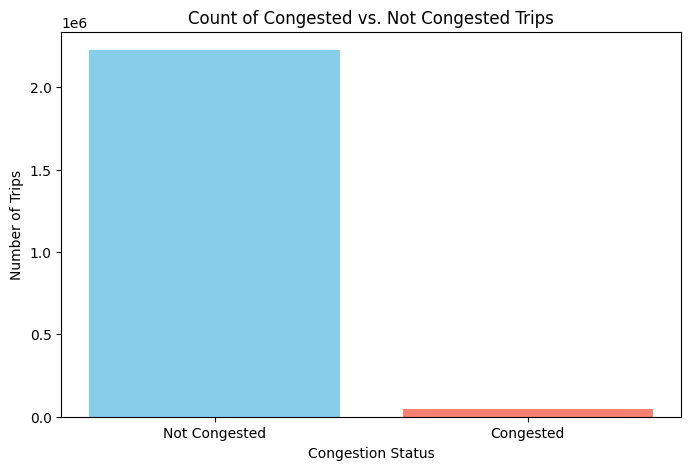

In [ ]:
import matplotlib.pyplot as plt

# Count of congestion classes
congestion_counts = df_filtered['congestion'].value_counts()

# Bar plot for congestion counts
plt.figure(figsize=(8, 5))
plt.bar(congestion_counts.index, congestion_counts.values, color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Not Congested', 'Congested'])
plt.title('Count of Congested vs. Not Congested Trips')
plt.xlabel('Congestion Status')
plt.ylabel('Number of Trips')
plt.show()


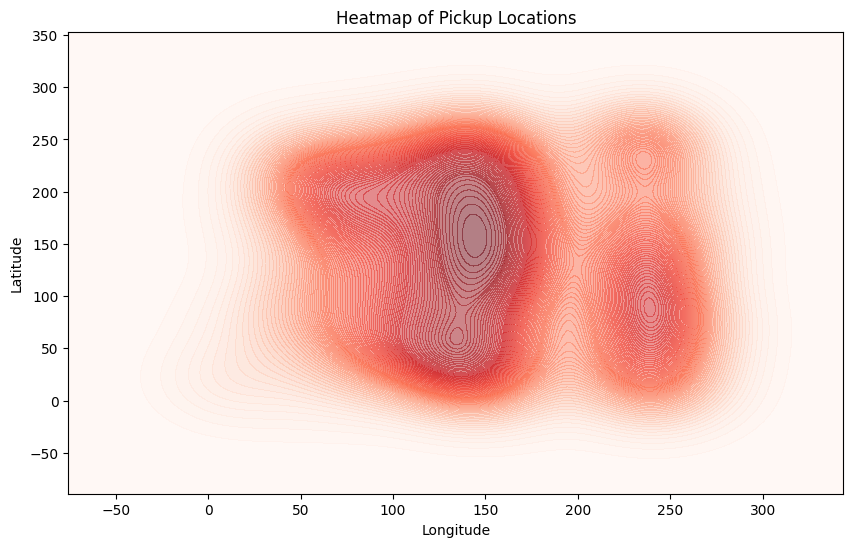

In [ ]:
import seaborn as sns

# Create a heatmap for pickup locations
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df_filtered['PULocationID'],
    y=taxi_zones['location_i'],
    cmap='Reds',
    fill=True,
    thresh=0,
    levels=100,
    alpha=0.5
)
plt.title('Heatmap of Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
import folium

# Create a base map
map_center = [df_filtered['PULocationID'].mean(), taxi_zones['location_i'].mean()]
map_congestion = folium.Map(location=map_center, zoom_start=12)

# Add congestion points to the map
for lat, lon, congestion in zip(df_filtered['PULocationID'],taxi_zones['location_i'], df_filtered['congestion']):
    color = 'green' if congestion == 0 else 'red'
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6
    ).add_to(map_congestion)

# Show the map
map_congestion.save('congestion_map.html')


<ipython-input-127-4ee0f88a75df>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_congestion = df_filtered.resample('H', on='tpep_pickup_datetime').mean()['congestion']


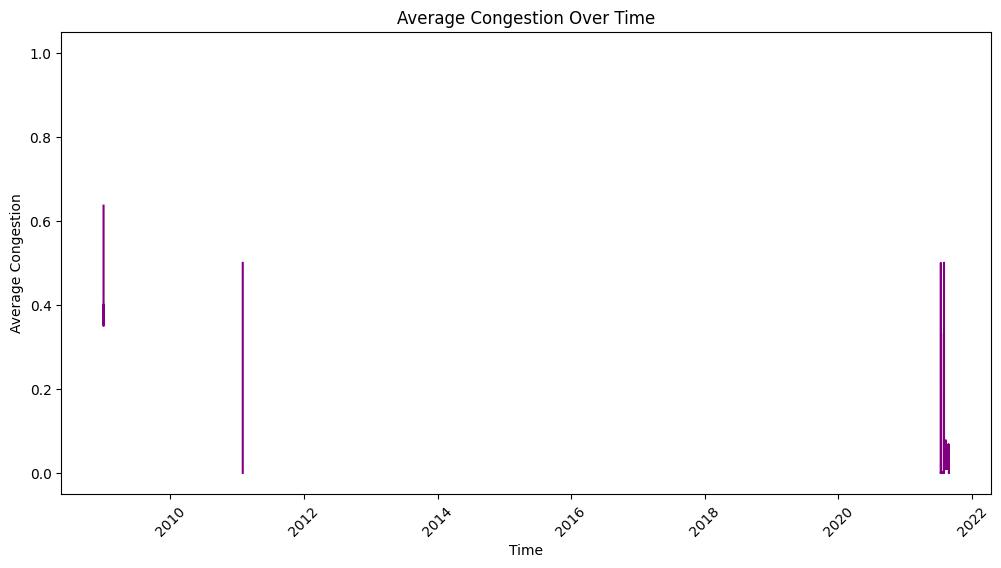

In [ ]:
# Convert pickup datetime to pandas datetime if you have a date column
# df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Resample data by hour to calculate congestion
hourly_congestion = df_filtered.resample('H', on='tpep_pickup_datetime').mean()['congestion']

# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_congestion.index, hourly_congestion, color='purple')
plt.title('Average Congestion Over Time')
plt.xlabel('Time')
plt.ylabel('Average Congestion')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 300),         # Number of trees
    'max_depth': [None] + list(range(5, 21)),  # Max depth of the trees
    'min_samples_split': randint(2, 10),      # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 10),       # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']          # Number of features to consider when looking for the best split
}


In [ ]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier,
                                   param_distributions=param_dist,
                                   n_iter=100,        # Number of parameter settings sampled
                                   cv=3,              # Number of cross-validation folds
                                   n_jobs=-1,         # Use all available cores
                                   verbose=2,         # Verbosity level
                                   random_state=42)


In [ ]:
from joblib import dump

# After training
dump(model, 'rf.joblib')

['rf.joblib']

In [ ]:
joblib.dump(sarima_model, "demand_model.pkl")
joblib.dump(model, "fare_model.pkl")
joblib.dump(model2, "fare2_model.pkl")
joblib.dump(rf_classifier, "congestion_model.pkl")
joblib.dump(kmeans, "k_model.pkl")


['k_model.pkl']

In [ ]:
!pip install pyngrok
!pip install streamlit -q




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [ ]:
!npm install -g localtunnel



⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼
added 22 packages in 3s
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠼

In [ ]:
!apt-get install nodejs -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  javascript-common libc-ares2 libjs-highlight.js libnode72 nodejs-doc
Suggested packages:
  apache2 | lighttpd | httpd npm
The following NEW packages will be installed:
  javascript-common libc-ares2 libjs-highlight.js libnode72 nodejs nodejs-doc
0 upgraded, 6 newly installed, 0 to remove and 30 not upgraded.
Need to get 13.7 MB of archives.
After this operation, 54.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 javascript-common all 11+nmu1 [5,936 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libjs-highlight.js all 9.18.5+dfsg1-1 [367 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-ares2 amd64 1.18.1-1ubuntu0.22.04.3 [45.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libnode72 amd64 12.22.9~dfsg-1ubuntu3.6 [10.8 MB]


In [ ]:
code ="""
import streamlit as st
from streamlit.runtime.scriptrunner import RerunException
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import seaborn as sns

# Set Streamlit page config
st.set_page_config(page_title="NYC TLC Data Analysis", layout="wide")

# ---- Sidebar ----
st.sidebar.title("NYC TLC Data Project")
st.sidebar.write("Analyze and predict NYC Taxi data using ML models.")

# ---- File Upload ----
uploaded_file = st.sidebar.file_uploader("Upload a CSV file", type=["csv"])
if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.sidebar.success("File uploaded successfully!")

    # Convert date columns to datetime and extract features
    for col in df.columns:
        if pd.api.types.is_string_dtype(df[col]) and 'date' in col.lower():
            df[col] = pd.to_datetime(df[col], errors='coerce')
            df[f"{col}_timestamp"] = df[col].astype('int64') // 10**9  # Convert to timestamp
else:
    st.sidebar.warning("Please upload a valid dataset to continue.")

# ---- Data Overview ----
st.title("NYC TLC Data Analysis and Prediction")
if uploaded_file:
    st.header("1. Data Overview")
    st.write("### Raw Data")
    st.write(df.head(10))

    # Display statistics
    st.write("### Dataset Summary")
    st.write(df.describe())

    # Check for missing data
    st.write("### Missing Values")
    st.write(df.isnull().sum())

# ---- Exploratory Data Analysis ----
if uploaded_file:
    st.header("2. Exploratory Data Analysis")
    st.write("### Correlation Heatmap")
    numeric_df = df.select_dtypes(include=[np.number])  # Only numeric columns
    corr = numeric_df.corr()
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", ax=ax)
    st.pyplot(fig)

    st.write("### Demand Distribution")
    if "trip_distance" in df.columns:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.histplot(df["trip_distance"].dropna(), bins=30, kde=True, ax=ax)
        st.pyplot(fig)

# ---- SARIMA Demand Prediction ----
if uploaded_file:
    st.header("3. SARIMA Demand Prediction")
    numeric_columns = numeric_df.columns
    demand_col = st.selectbox("Select the column for demand forecasting:", numeric_columns)

    if st.button("Run SARIMA Model"):
        y = df[demand_col].dropna()  # Drop missing values
        model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        model_fitted = model.fit()

        # Forecast next 12 periods
        forecast = model_fitted.forecast(steps=12)

        # Plot results
        st.write("### Forecasted Demand")
        fig, ax = plt.subplots(figsize=(10, 6))
        y.plot(ax=ax, label="Observed", legend=True)
        forecast.plot(ax=ax, label="Forecast", legend=True)
        st.pyplot(fig)

# ---- Fare Prediction ----
if uploaded_file:
    st.header("4. Fare Prediction Models")
    features = st.multiselect("Select features for prediction:", numeric_columns)
    target = st.selectbox("Select the target column (fare):", numeric_columns)

    if st.button("Train Linear Regression"):
        X = df[features].dropna()
        y = df[target].dropna()
        model = LinearRegression()
        model.fit(X, y)

        # Predictions
        predictions = model.predict(X)
        mse = mean_squared_error(y, predictions)
        mae = mean_absolute_error(y, predictions)

        st.write(f"Mean Squared Error: {mse}")
        st.write(f"Mean Absolute Error: {mae}")

# ---- Congestion Prediction ----
if uploaded_file:
    st.header("5. Congestion Prediction (Random Forest)")
    congestion_col = st.selectbox("Select congestion column (binary target):", numeric_columns)

    if st.button("Run Random Forest Classifier"):
        features = [col for col in numeric_columns if col != congestion_col]
        X = df[features].dropna()
        y = df[congestion_col].dropna()

        model = RandomForestClassifier()
        model.fit(X, y)

        predictions = model.predict(X)
        accuracy = (predictions == y).mean()

        st.write(f"Model Accuracy: {accuracy:.2f}")

# ---- Clustering Demand Zones ----
if uploaded_file:
    st.header("6. Clustering Demand Zones")
    cluster_features = st.multiselect("Select features for clustering:", numeric_columns)

    if st.button("Run K-Means Clustering"):
        X = df[cluster_features].dropna()
        kmeans = KMeans(n_clusters=5, random_state=42)
        df["cluster"] = kmeans.fit_predict(X)

        st.write("### Clustered Data")
        st.write(df[["cluster"] + cluster_features].head())

        # Plot clusters (if 2D)
        if len(cluster_features) == 2:
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.scatterplot(x=df[cluster_features[0]], y=df[cluster_features[1]], hue=df["cluster"], palette="viridis", ax=ax)
            st.pyplot(fig)


"""
import streamlit as st
from streamlit.runtime.scriptrunner import RerunException
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import seaborn as sns

# Set Streamlit page config
st.set_page_config(page_title="NYC TLC Data Analysis", layout="wide")

# ---- Sidebar ----
st.sidebar.title("NYC TLC Data Project")
st.sidebar.write("Analyze and predict NYC Taxi data using ML models.")

# ---- File Upload ----
uploaded_file = st.sidebar.file_uploader("Upload a CSV file", type=["csv"])
if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.sidebar.success("File uploaded successfully!")

    # Convert date columns to datetime and extract features
    for col in df.columns:
        if pd.api.types.is_string_dtype(df[col]) and 'date' in col.lower():
            df[col] = pd.to_datetime(df[col], errors='coerce')
            df[f"{col}_timestamp"] = df[col].astype('int64') // 10**9  # Convert to timestamp
else:
    st.sidebar.warning("Please upload a valid dataset to continue.")

# ---- Data Overview ----
st.title("NYC TLC Data Analysis and Prediction")
if uploaded_file:
    st.header("1. Data Overview")
    st.write("### Raw Data")
    st.write(df.head(10))

    # Display statistics
    st.write("### Dataset Summary")
    st.write(df.describe())

    # Check for missing data
    st.write("### Missing Values")
    st.write(df.isnull().sum())

# ---- Exploratory Data Analysis ----
if uploaded_file:
    st.header("2. Exploratory Data Analysis")
    st.write("### Correlation Heatmap")
    numeric_df = df.select_dtypes(include=[np.number])  # Only numeric columns
    corr = numeric_df.corr()
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", ax=ax)
    st.pyplot(fig)

    st.write("### Demand Distribution")
    if "trip_distance" in df.columns:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.histplot(df["trip_distance"].dropna(), bins=30, kde=True, ax=ax)
        st.pyplot(fig)

# ---- SARIMA Demand Prediction ----
if uploaded_file:
    st.header("3. SARIMA Demand Prediction")
    numeric_columns = numeric_df.columns
    demand_col = st.selectbox("Select the column for demand forecasting:", numeric_columns)

    if st.button("Run SARIMA Model"):
        y = df[demand_col].dropna()  # Drop missing values
        model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        model_fitted = model.fit()

        # Forecast next 12 periods
        forecast = model_fitted.forecast(steps=12)

        # Plot results
        st.write("### Forecasted Demand")
        fig, ax = plt.subplots(figsize=(10, 6))
        y.plot(ax=ax, label="Observed", legend=True)
        forecast.plot(ax=ax, label="Forecast", legend=True)
        st.pyplot(fig)

# ---- Fare Prediction ----
if uploaded_file:
    st.header("4. Fare Prediction Models")
    features = st.multiselect("Select features for prediction:", numeric_columns)
    target = st.selectbox("Select the target column (fare):", numeric_columns)

    if st.button("Train Linear Regression"):
        X = df[features].dropna()
        y = df[target].dropna()
        model = LinearRegression()
        model.fit(X, y)

        # Predictions
        predictions = model.predict(X)
        mse = mean_squared_error(y, predictions)
        mae = mean_absolute_error(y, predictions)

        st.write(f"Mean Squared Error: {mse}")
        st.write(f"Mean Absolute Error: {mae}")

# ---- Congestion Prediction ----
if uploaded_file:
    st.header("5. Congestion Prediction (Random Forest)")
    congestion_col = st.selectbox("Select congestion column (binary target):", numeric_columns)

    if st.button("Run Random Forest Classifier"):
        features = [col for col in numeric_columns if col != congestion_col]
        X = df[features].dropna()
        y = df[congestion_col].dropna()

        model = RandomForestClassifier()
        model.fit(X, y)

        predictions = model.predict(X)
        accuracy = (predictions == y).mean()

        st.write(f"Model Accuracy: {accuracy:.2f}")

# ---- Clustering Demand Zones ----
if uploaded_file:
    st.header("6. Clustering Demand Zones")
    cluster_features = st.multiselect("Select features for clustering:", numeric_columns)

    if st.button("Run K-Means Clustering"):
        X = df[cluster_features].dropna()
        kmeans = KMeans(n_clusters=5, random_state=42)
        df["cluster"] = kmeans.fit_predict(X)

        st.write("### Clustered Data")
        st.write(df[["cluster"] + cluster_features].head())

        # Plot clusters (if 2D)
        if len(cluster_features) == 2:
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.scatterplot(x=df[cluster_features[0]], y=df[cluster_features[1]], hue=df["cluster"], palette="viridis", ax=ax)
            st.pyplot(fig)

st.sidebar.header("Suggestions")
st.sidebar.info("""
Ensure your dataset has the necessary columns for each model.
Handle missing data before running models.
- For time series, sort data by time before forecasting.
""")
"""


"""
with open('app.py', 'w') as f:
    f.write(code)


2025-04-11 15:05:44.493 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-11 15:05:44.496 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-11 15:05:45.731 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-11 15:05:45.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-11 15:05:45.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-11 15:05:45.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-11 15:05:45.736 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [ ]:
!curl ifconfig.me


35.229.94.120

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



internal/modules/cjs/loader.js:818
  throw err;
  ^

Error: Cannot find module 'node:path'
Require stack:
- /tools/node/lib/node_modules/npm/lib/cli.js
- /tools/node/lib/node_modules/npm/bin/npx-cli.js
    at Function.Module._resolveFilename (internal/modules/cjs/loader.js:815:15)
    at Function.Module._load (internal/modules/cjs/loader.js:667:27)
    at Module.require (internal/modules/cjs/loader.js:887:19)
    at require (internal/modules/cjs/helpers.js:85:18)
    at Object.<anonymous> (/tools/node/lib/node_modules/npm/lib/cli.js:2:18)
    at Module._compile (internal/modules/cjs/loader.js:999:30)
    at Object.Module._extensions..js (internal/modules/cjs/loader.js:1027:10)
    at Module.load (internal/modules/cjs/loader.js:863:32)
    at Function.Module._load (internal/modules/cjs/loader.js:708:14)
    at Module.require (internal/modules/cjs/loader.js:887:19) {
  code: 'MODULE_NOT_FOUND',
  requireStack: [
    '/tools/node/lib/node_modules/npm/lib/cli.js',
    '/tools/node/lib/node